In [4]:
import pymesh
import numpy as np
import matplotlib.pyplot as plt

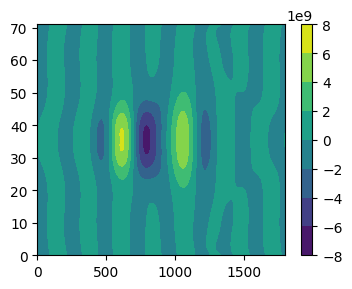

In [5]:
##########################################
############ Rotate Mesh Data ############
##########################################

wkdir = "/Users/caijie/Documents/VScode/data/"

ey = np.load(wkdir + "thz.npy")[::2, ::50]

m, n = ey.shape[0], ey.shape[1]
res = np.zeros([m, n, n])
pymesh.rotate(ey, res, ifhalf = False)

fig = plt.figure(figsize=(4, 3))
plt.contourf(res[:, int(n/2), :].T)
cbar = plt.colorbar()

In [6]:
##########################################
############# Save Mesh Data #############
##########################################

mesh = pymesh.get_iso_surf(res, contours_number = 4, cmap = plt.cm.jet)
color = pymesh.interp_color(mesh.iso_vals, pltmap = plt.cm.jet)

mesh.verts[:, 0] *= 1/10

mesh.export(wkdir + "test", "obj")

In [7]:
##########################################
############# Load Mesh Data #############
##########################################

mesh = pymesh.Mesh.load(wkdir + "test", "obj")

In [ ]:
################ plt example #################

surf = mesh.plt_trisurf(cmap = plt.cm.jet)
plt.colorbar(surf, orientation = 'horizontal')
plt.tight_layout()